**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display
from scipy import stats

%matplotlib inline 
np.random.seed(42)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [13]:
housing_df = pd.read_csv('train.csv')

In [14]:
housing_df.head() #81 columns, 1460 observations

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [15]:
housing_df.info() #missing values, looks like correct data types 
#missing values: Lot frontage, Alley, MasVnrType, MasVnrData, BSMTQual, BSMTCond, BSMTExposure, BSMTFinType1, MSMTFinType2
#                electrical, FireplaceQU, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence,
#               MiscFeature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [16]:
housing_df.set_index('Id')

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
6             50       RL         85.0    14115   Pave   NaN      IR1   
7             20       RL         75.0    10084   Pave   NaN      Reg   
8             60       RL          NaN    10382   Pave   NaN      IR1   
9             50       RM         51.0     6120   Pave   NaN      Reg   
10           190       RL         50.0     7420   Pave   NaN      Reg   
11            20       RL         70.0    11200   Pave   NaN      Reg   
12            60       RL         85.0    11924   Pave   NaN      IR1   
13            20       RL          NaN    12968   Pave   NaN      IR2   
14            20       RL         91.0    10652   Pave   NaN      IR1   
15            20       RL          NaN    10920   Pave   NaN      IR1   
16            45       RM         51.0     6120   Pave   NaN      Reg   
17            20       RL          NaN    11241   Pave   NaN      IR1   
18            90       RL         72.0    10791   Pave   NaN      Reg   
19            20       RL         66.0    13695   Pave   NaN      Reg   
20            20       RL         70.0     7560   Pave   NaN      Reg   
21            60       RL        101.0    14215   Pave   NaN      IR1   
22            45       RM         57.0     7449   Pave  Grvl      Reg   
23            20       RL         75.0     9742   Pave   NaN      Reg   
24           120       RM         44.0     4224   Pave   NaN      Reg   
25            20       RL          NaN     8246   Pave   NaN      IR1   
26            20       RL        110.0    14230   Pave   NaN      Reg   
27            20       RL         60.0     7200   Pave   NaN      Reg   
28            20       RL         98.0    11478   Pave   NaN      Reg   
29            20       RL         47.0    16321   Pave   NaN      IR1   
30            30       RM         60.0     6324   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1431          60       RL         60.0    21930   Pave   NaN      IR3   
1432         120       RL          NaN     4928   Pave   NaN      IR1   
1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1434          60       RL         93.0    10261   Pave   NaN      IR1   
1435          20       RL         80.0    17400   Pave   NaN      Reg   
1436          20       RL         80.0     8400   Pave   NaN      Reg   
1437          20       RL         60.0     9000   Pave   NaN      Reg   
1438          20       RL         96.0    12444   Pave   NaN      Reg   
1439          20       RM         90.0     7407   Pave   NaN      Reg   
1440          60       RL         80.0    11584   Pave   NaN      Reg   
1441          70       RL         79.0    11526   Pave   NaN      IR1   
1442         120       RM          NaN     4426   Pave   NaN      Reg   
1443          60       FV         85.0    11003   Pave   NaN      Reg   
1444          30       RL          NaN     8854   Pave   NaN      Reg   
1445          20       RL         63.0     8500   Pave   NaN      Reg   
1446          85       RL         70.0     8400   Pave   NaN      Reg   
1447          20       RL          NaN    26142   Pave   NaN      IR1   
1448          60       RL         80.0    10000   Pave   NaN      Reg   
1449          50       RL         70.0    11767   Pave   NaN      Reg   
1450         180       RM         21.0     1533   Pave   NaN      Reg   
1451          90       RL         60.0     9000   Pave   NaN      Reg   
1452          20       RL         78.0     9262   Pave   NaN    

**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

| Column        | Numerical/Catagorical 
| ------------- |:-------------:|
| MSSubClass    | Catagorical
| MSZoning      | Catagorical    
| LotFrontage   | Numerical       
| LotArea       | Numerical       
| Street        | Catagorical     
| Alley         | Catagorical(nan = no alley) 
| LotShape      | Catagorical       
| LandContour   | Catagorical      
| $\vdots$   | $\vdots$      
| BsmtQual   | Catagorical (nan = no basement)       
| BsmtCond   | Catagorical (nan = no basement)       
| BsmtExposure   | Catagorical (nan = no basement)      
| BsmntFinType1/2   | Catagorical (nan = no basement)       
| FireplaceQu   | Catagorical (nan = no fireplace)       
| GarageType   | Catagorical (nan = no garage)       
| GarageFinish | Catagorical (nan = no garage)       
| GarageQual | Catagorical (nan = no garage)       
| GarageCond | Catagorical (nan = no garage)      
| PoolQC     | Catagorical (nan = no pool)       
| Fence      | Catagorical (nan = no fence)       
| MiscFeatures | Catagorical (nan = no features)       
| $\vdots$   | $\vdots$     


The MSubClass is catagorical but was loaded as an Int

In [17]:
#changing the type of MSSubClass to make it catagorical
housing_df['MSSubClass'] = housing_df['MSSubClass'].astype(str)

In [18]:
#breaking the df into numerical data

housing_num = []
for col_names in housing_df:
    if (type(housing_df[col_names][3]) == np.int64 or type(housing_df[col_names][3]) == np.float64):
            housing_num.append(housing_df[col_names])
            
housing_num_df = pd.DataFrame(housing_num).transpose()
housing_num_df.head() #37 columns

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1.0         65.0   8450.0          7.0          5.0     2003.0   
1  2.0         80.0   9600.0          6.0          8.0     1976.0   
2  3.0         68.0  11250.0          7.0          5.0     2001.0   
3  4.0         60.0   9550.0          7.0          5.0     1915.0   
4  5.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2    ...      WoodDeckSF  \
0        2003.0       196.0       706.0         0.0    ...             0.0   
1        1976.0         0.0       978.0         0.0    ...           298.0   
2        2002.0       162.0       486.0         0.0    ...             0.0   
3        1970.0         0.0       216.0         0.0    ...             0.0   
4        2000.0       350.0       655.0         0.0    ...           192.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0            0.0        0.0          0.0       0.0      0.0   
1          0.0            0.0        0.0          0.0       0.0      0.0   
2         42.0            0.0        0.0          0.0       0.0      0.0   
3         35.0          272.0        0.0          0.0       0.0      0.0   
4         84.0            0.0        0.0          0.0       0.0      0.0   

   MoSold  YrSold  SalePrice  
0     2.0  2008.0   208500.0  
1     5.0  2007.0   181500.0  
2     9.0  2008.0   223500.0  
3     2.0  2006.0   140000.0  
4    12.0  2008.0   250000.0  

[5 rows x 37 columns]

In [19]:
#breaking the df into catagorical data
housing_cat = []
for col_names in housing_df:
    if (type(housing_df[col_names][3]) == str) or (type(housing_df[col_names][3]) == float):
        housing_cat.append(housing_df[col_names])
housing_cat_df = pd.DataFrame(housing_cat).transpose()
housing_cat_df.head() #44 columns

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave   NaN      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave   NaN      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave   NaN      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood      ...      GarageType GarageFinish GarageQual  \
0       Gtl      CollgCr      ...          Attchd          RFn         TA   
1       Gtl      Veenker      ...          Attchd          RFn         TA   
2       Gtl      CollgCr      ...          Attchd          RFn         TA   
3       Gtl      Crawfor      ...          Detchd          Unf         TA   
4       Gtl      NoRidge      ...          Attchd          RFn         TA   

  GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0         TA          Y    NaN   NaN         NaN       WD        Normal  
1         TA          Y    NaN   NaN         NaN       WD        Normal  
2         TA          Y    NaN   NaN         NaN       WD        Normal  
3         TA          Y    NaN   NaN         NaN       WD       Abnorml  
4         TA          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 44 columns]

### B. Plot histograms of the numeric columns. 

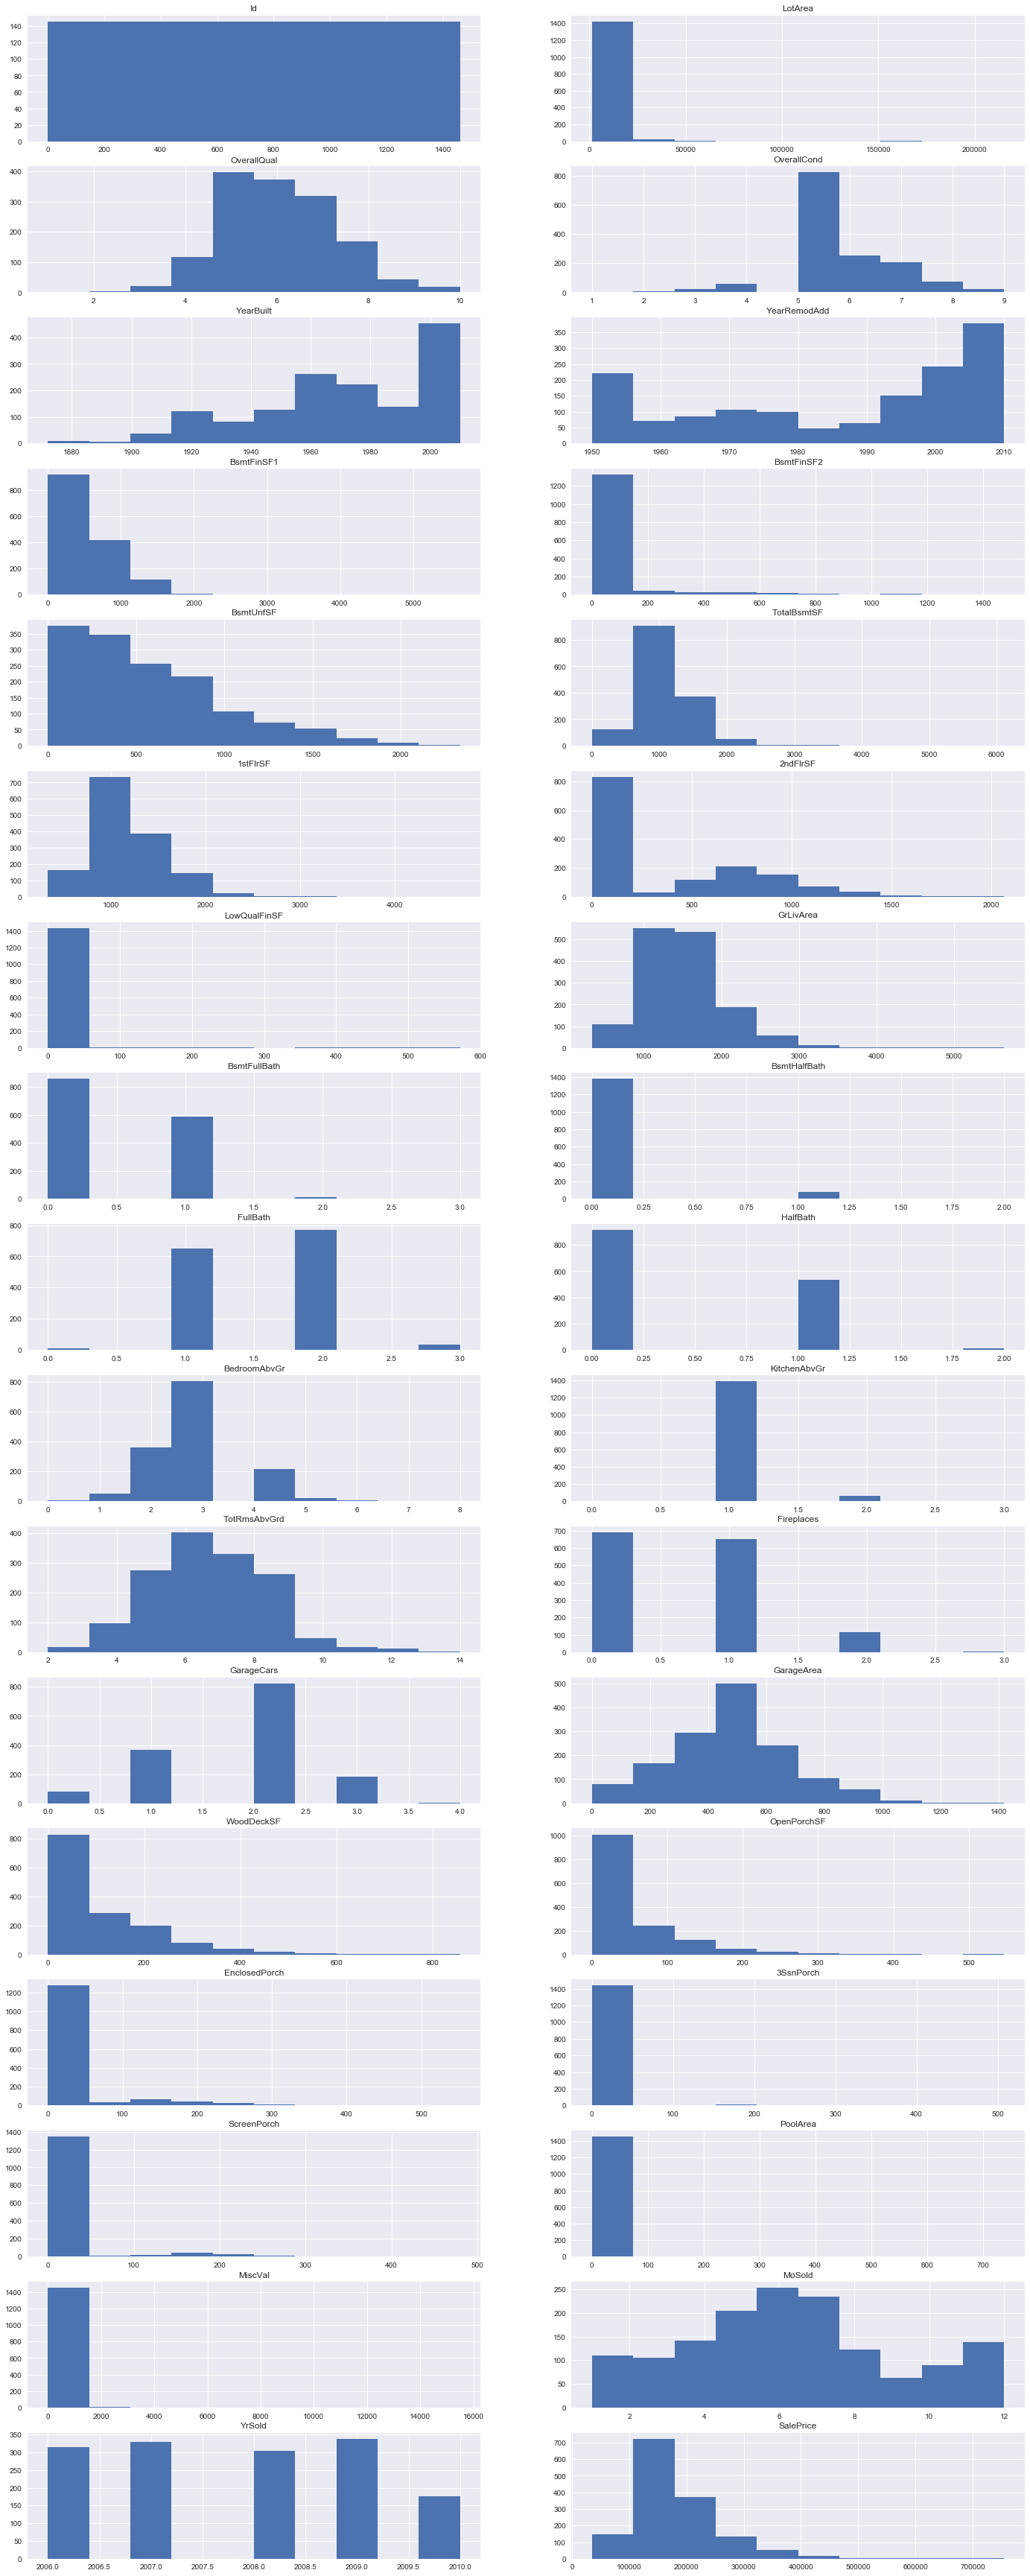

In [96]:
fig = plt.figure(figsize = (24,74))
i = 0 

for col_names in housing_num_df:
        if housing_df[col_names].count() == 1460:
            i += 1
            fig.add_subplot(20,2,i)
            plt.hist(housing_num_df[col_names])
            plt.title(col_names)


#### What are your observations? Add them to this markdown cell.
 
---
-SalesPrice is fairly heavily skewed. Could certainly pose some problems when we run a regression on it


### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

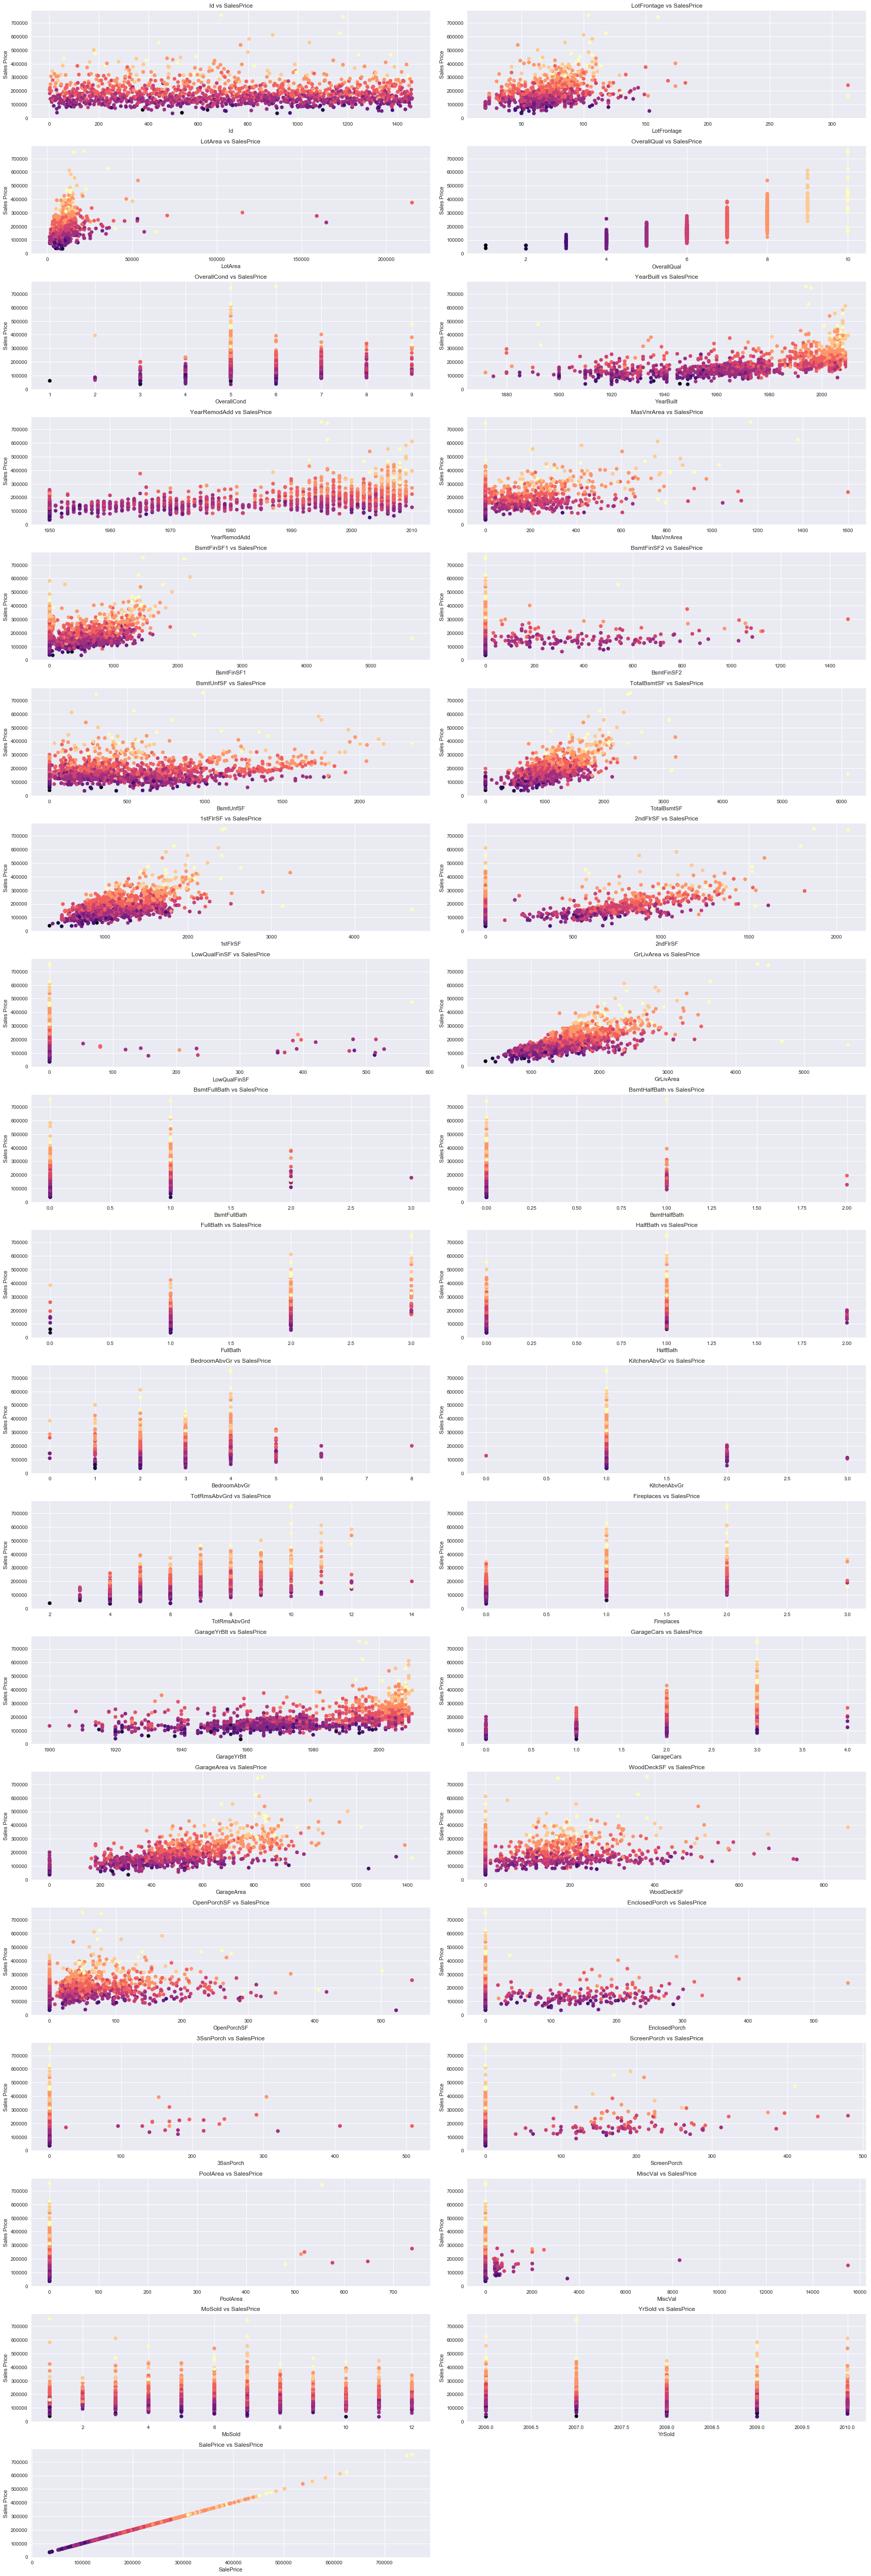

In [10]:
fig = plt.figure(figsize = (24,74))
i = 0

for col_names in housing_num_df:
    i += 1
    fig.add_subplot(20,2,i)
    plt.scatter(housing_num_df[col_names], housing_df['SalePrice'], c = housing_df['OverallQual'], cmap = 'magma')
    plt.title(col_names + " vs SalesPrice")
    plt.xlabel(col_names)
    plt.ylabel('Sales Price')
    plt.legend

plt.tight_layout()

#### What are your observations? Add them to this markdown cell.

---
A lot of the numerical values do have some trend with the sale price. Also we see that there is a fairly consistent pattern with the quality of the house and the sale price



In [24]:
cor = housing_num_df.corr()
high_cor = cor[abs(cor['SalePrice']) > .5]
high_cor['SalePrice']

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

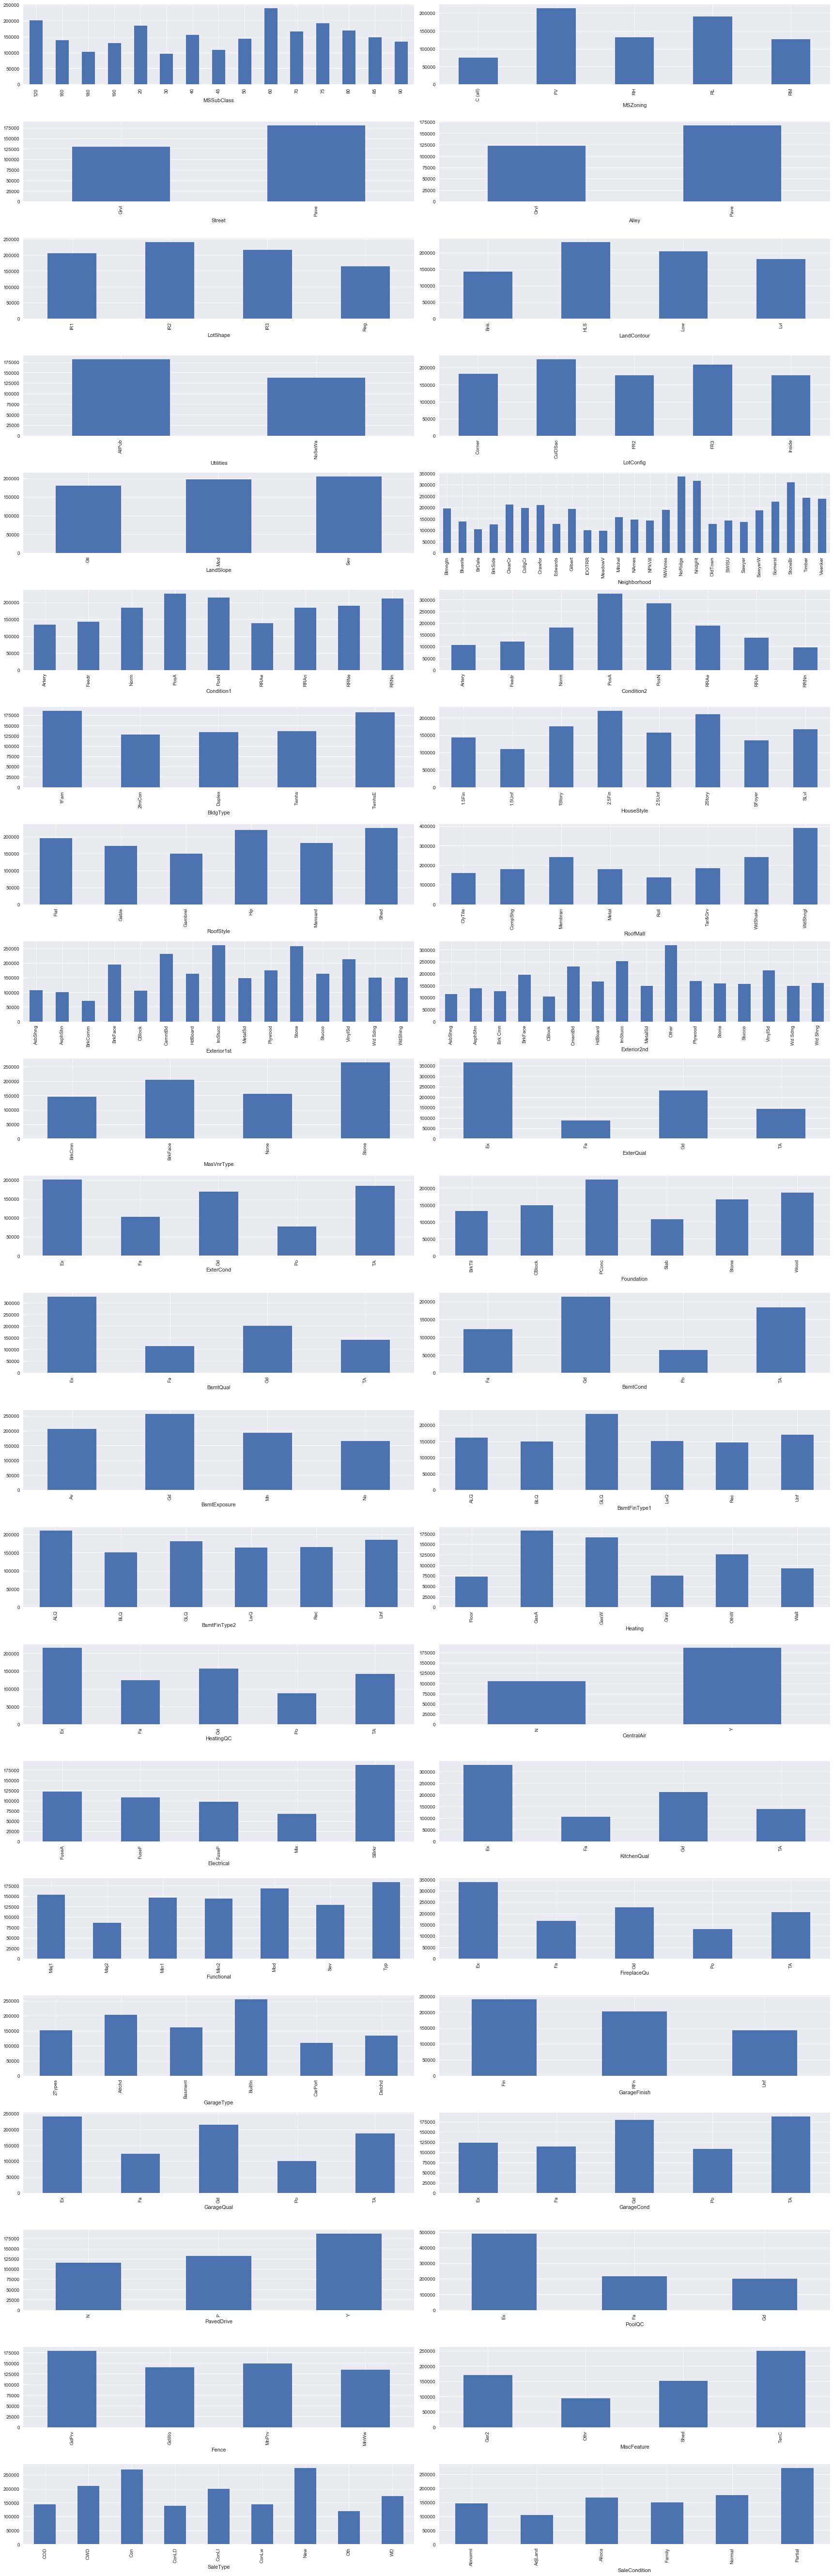

In [13]:
fig = plt.figure(figsize = (24,74))
i = 0

for col_names in housing_cat_df:
    i += 1
    fig.add_subplot(22,2,i)
    housing_df.groupby(col_names).mean()['SalePrice'].plot.bar()
    
plt.tight_layout()

MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


<function matplotlib.pyplot.tight_layout>

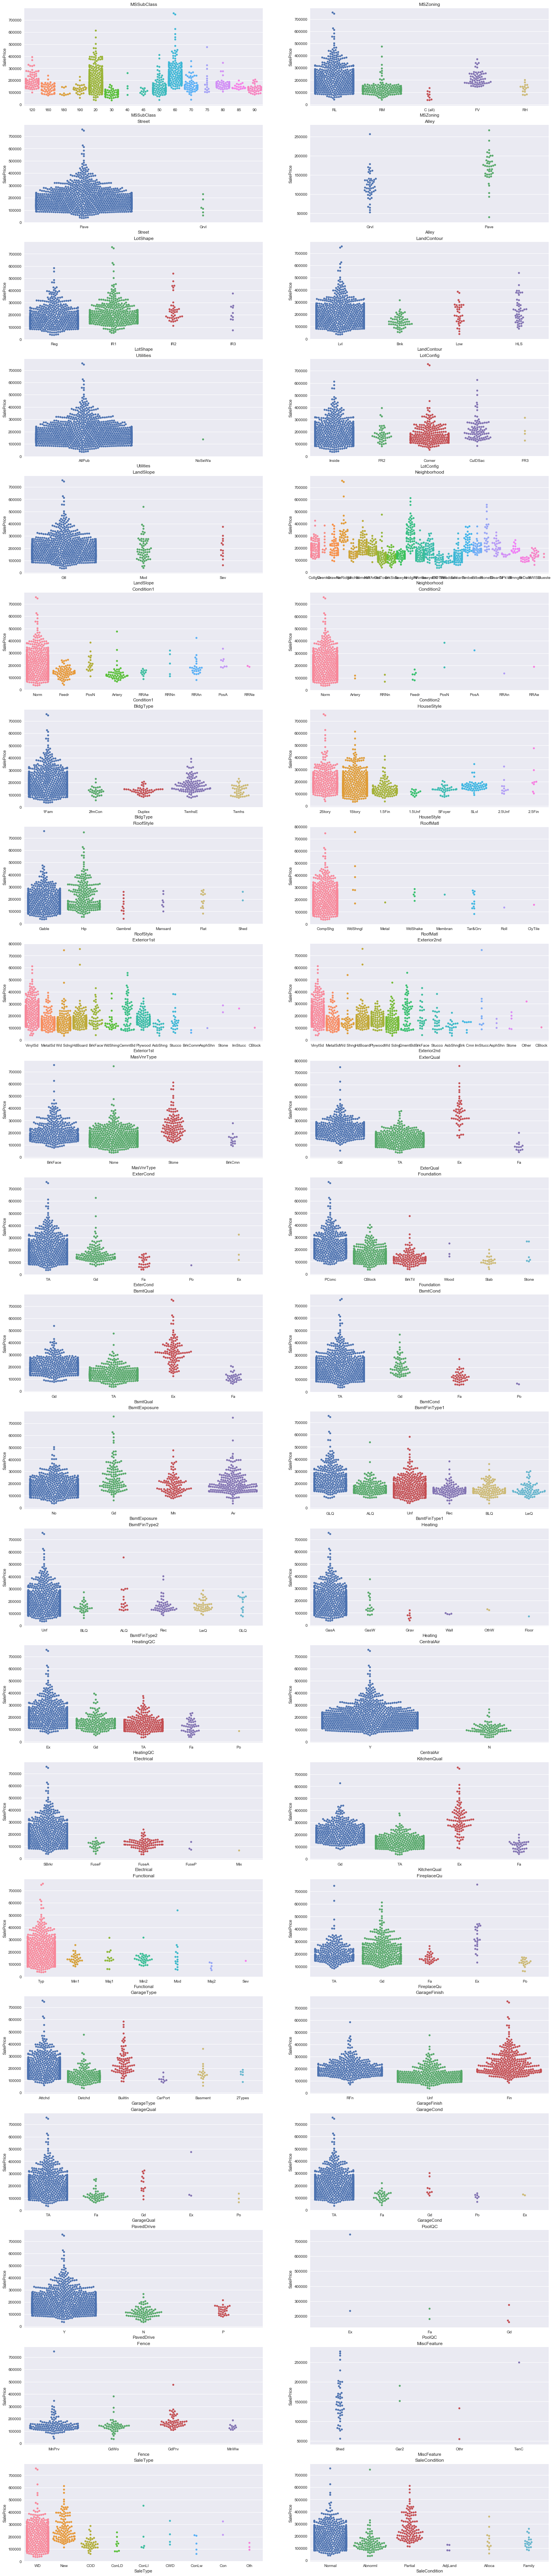

In [26]:
fig = plt.figure(figsize = (24,120))
i = 0

for col_names in housing_cat_df:
    i += 1
    print(col_names)
    fig.add_subplot(22,2,i)
    sns.swarmplot(housing_cat_df[col_names], housing_df['SalePrice'])
    plt.title(col_names)
plt.tight_layout

## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

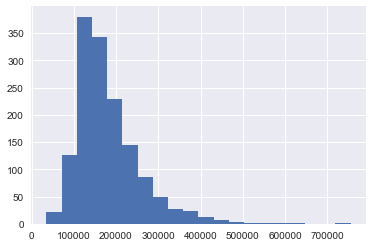

In [20]:
housing_df['SalePrice'].hist(bins = 20) #Skewed Right

In [21]:
housing_df['SalePrice'].describe()
#mean: 180921.20
#median: 163000.00
#std: 79442.50
#max: 755000

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Since SalesPrice is not normally distributed, it would be a little bit careless to use Tukey's method to detect outliers. Also, there does not appear to be any data entry errors, so all of the outliers are occuring naturally in the data. I'm not sure if it would be acceptable to remove outiers at all in this case...however, as a bit of a compromise, I will say any SalePrice over 4 standard deviations away from the mean to be an outlier.

In [22]:
upper = housing_df['SalePrice'].mean() + 4*housing_df['SalePrice'].std()
upper #498691
housing_df = housing_df[housing_df['SalePrice'] < upper] # => 9 values
housing_df.info()
#housing_df['SalePrice'].sort_values()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null object
MSZoning         1451 non-null object
LotFrontage      1192 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
Alley            91 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-

### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

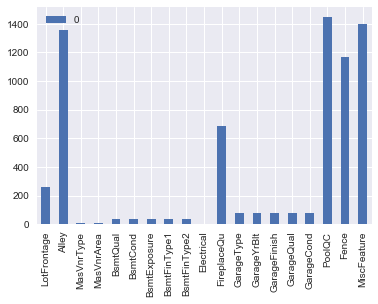

In [23]:
nan_list = housing_df.isnull().sum()
nans = pd.DataFrame(nan_list)
nans[(nans[0] != 0)].plot.bar()

Verify that you have *truly* eliminated all the null values!

In [24]:
#LotFrontage, seems reasonable to replace missing values with the mean LotFrontage
housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].mean(), inplace = True)

In [25]:
#filling in missing values for: Alley, MasVnrType, BSMTQual, BSMTCond, BSMTExposure, BSMTFinType1, MSMTFinType2
#                               electrical, FireplaceQU, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC,
#                               Fence, MiscFeature
# for all of these cases, a nan meant that there was not that feature
# so we replcace them with the string 'none'

for col_names in housing_df:
    if (type(housing_df[col_names][3]) == str) or (type(housing_df[col_names][3]) == float):
        housing_df[col_names].fillna('none', inplace = True)
                

In [26]:
#MasVnrArea, replacing with 0's seems reasonable
housing_df['MasVnrArea'].fillna(0, inplace = True)

In [27]:
#GarageYrBlt, im thinking of replacing the missing values with a number reasonably below the minimum year built to keep the linear
#nature of the year vs price
housing_df['GarageYrBlt'].describe()
housing_df['GarageYrBlt'].fillna(1890, inplace = True)

In [28]:
#every column now has 1451 observations
housing_df.isnull().values.any()

False

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [29]:
df_with_dummies = pd.get_dummies(housing_df, drop_first = True) #to avoid multicollinearity

In [30]:
df_with_dummies.head() #276 columns

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
0          2003       196.0         706           0          ...             
1          1976         0.0         978           0          ...             
2          2002       162.0         486           0          ...             
3          1970         0.0         216           0          ...             
4          2000       350.0         655           0          ...             

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 276 columns]

### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [31]:
from sklearn.model_selection import train_test_split

In [26]:
X = df_with_dummies.drop(['SalePrice','Id'], axis=1)
y = df_with_dummies['SalePrice']

In [27]:
X.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            \
0       196.0         706           0        150          ...             
1         0.0         978           0        284          ...             
2       162.0         486           0        434          ...             
3         0.0         216           0        540          ...             
4       350.0         655           0        490          ...             

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 274 columns]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Instantiate
scaler = StandardScaler()
# fit_transform
X_train_scaled = scaler.fit_transform(X_train)
# transform
X_test_scaled = scaler.transform(X_test)

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [31]:
from sklearn.linear_model import LinearRegression

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

In [ ]:
example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

Then we pass the results list to pass to a DataFrame.

In [ ]:
pd.DataFrame(example_results)

This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [33]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [34]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [35]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [36]:
benchmark_scaled = LinearRegression()
benchmark_scaled.fit(X_train_scaled, y_train)
scaled_train_score = benchmark_scaled.score(X_train_scaled, y_train)
scaled_test_score = benchmark_scaled.score(X_test_scaled, y_test)

results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

Use a DataFrame to display your results.

In [37]:
pd.DataFrame(results)

dataset                                              model       name  \
0   train  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
1    test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
2   train  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
3    test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   

  preprocessing         score  
0           raw  9.421634e-01  
1           raw  6.595026e-01  
2        scaled  9.421645e-01  
3        scaled -1.588735e+22

#### What are your observations? Add them to this markdown cell.

---
So our testing $R^2$ with the scaled data is practically $-\infty$.... not good. This suggests that our model is severely overfit (especially with such a high training $R^{2}$).

### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [38]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [39]:
#ridge
ridge_raw = Ridge()
ridge_raw.fit(X_train, y_train)
raw_train_score = ridge_raw.score(X_train, y_train)
raw_test_score = ridge_raw.score(X_test, y_test)

results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

ridge_scaled = Ridge()
ridge_scaled.fit(X_train_scaled, y_train)
scaled_train_score = ridge_scaled.score(X_train_scaled, y_train)
scaled_test_score = ridge_scaled.score(X_test_scaled, y_test)

results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})


In [40]:
#lasso
lasso_raw = Lasso()
lasso_raw.fit(X_train, y_train)
raw_train_score = lasso_raw.score(X_train, y_train)
raw_test_score = lasso_raw.score(X_test, y_test)

results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

lasso_scaled = Lasso()
lasso_scaled.fit(X_train_scaled, y_train)
scaled_train_score = lasso_scaled.score(X_train_scaled, y_train)
scaled_test_score = lasso_scaled.score(X_test_scaled, y_test)

results.append({'name':'lasso',
                'model':lasso_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'lasso',
                'model':lasso_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

C:\Users\Edward\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [41]:
#ElasticNet
elastic_raw = ElasticNet()
elastic_raw.fit(X_train, y_train)
raw_train_score = elastic_raw.score(X_train, y_train)
raw_test_score = elastic_raw.score(X_test, y_test)

results.append({'name':'elastic',
                'model':elastic_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'elastic',
                'model':elastic_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

elastic_scaled = ElasticNet()
elastic_scaled.fit(X_train_scaled, y_train)
scaled_train_score = elastic_scaled.score(X_train_scaled, y_train)
scaled_test_score = elastic_scaled.score(X_test_scaled, y_test)

results.append({'name':'elastic',
                'model':elastic_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'elastic',
                'model':elastic_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [42]:
results_df = pd.DataFrame(results)

In [43]:
results_df

dataset                                              model       name  \
0    train  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
1     test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
2    train  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
3     test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
4    train  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...      ridge   
5     test  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...      ridge   
6    train  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...      ridge   
7     test  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...      ridge   
8    train  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...      lasso   
9     test  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...      lasso   
10   train  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...      lasso   
11    test  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...      lasso   
12   train  ElasticNet(alpha=1.0, copy_X=True, fit_interce...    elastic   
13    test  ElasticNet(alpha=1.0, copy_X=True, fit_interce...    elastic   
14   train  ElasticNet(alpha=1.0, copy_X=True, fit_interce...    elastic   
15    test  ElasticNet(alpha=1.0, copy_X=True, fit_interce...    elastic   

   preprocessing         score  
0            raw  9.421634e-01  
1            raw  6.595026e-01  
2         scaled  9.421645e-01  
3         scaled -1.588735e+22  
4            raw  9.235815e-01  
5            raw  8.574883e-01  
6         scaled  9.417265e-01  
7         scaled  7.257656e-01  
8            raw  9.420582e-01  
9            raw  6.882937e-01  
10        scaled  9.421555e-01  
11        scaled  6.617574e-01  
12           raw  8.292897e-01  
13           raw  8.460726e-01  
14        scaled  8.926637e-01  
15        scaled  8.661923e-01

#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [44]:
results_df[(results_df.preprocessing == 'raw') & (results_df.dataset == 'test')]

dataset                                              model       name  \
1     test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
5     test  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...      ridge   
9     test  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...      lasso   
13    test  ElasticNet(alpha=1.0, copy_X=True, fit_interce...    elastic   

   preprocessing     score  
1            raw  0.659503  
5            raw  0.857488  
9            raw  0.688294  
13           raw  0.846073

#### What are your observations? Add them to this markdown cell.

---

Ridge and ElasticNet did the best, with $R^{2} = 0.857$ and 0.846 respectively. This is significantly better than our benchmark. However, it would make more sense to look at our scaled test results. 

#### Display just the scaled test results

In [47]:
results_df[(results_df.preprocessing == 'scaled') & (results_df.dataset == 'test')]

dataset                                              model       name  \
3     test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
7     test  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...      ridge   
11    test  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...      lasso   
15    test  ElasticNet(alpha=1.0, copy_X=True, fit_interce...    elastic   

   preprocessing         score  
3         scaled -1.588735e+22  
7         scaled  7.257656e-01  
11        scaled  6.617574e-01  
15        scaled  8.661923e-01

#### What are your observations? Add them to this markdown cell.

---

The scaled ElasticNet did the best with an $R^{2} = 0.866$. However, we haven't tuned our hyperparameter (alpha), so we might be able to achieve a higher $R^{2}$ with some cross-validation.

These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [46]:
results_df[(results_df.name == 'benchmark')]

dataset                                              model       name  \
0   train  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
1    test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
2   train  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
3    test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   

  preprocessing         score  
0           raw  9.421634e-01  
1           raw  6.595026e-01  
2        scaled  9.421645e-01  
3        scaled -1.588735e+22

#### Display just the Ridge models

In [57]:
results_df[(results_df.name == 'ridge')]

dataset                                              model   name  \
4   train  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...  ridge   
5    test  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...  ridge   
6   train  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...  ridge   
7    test  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...  ridge   

  preprocessing     score  
4           raw  0.923585  
5           raw  0.857480  
6        scaled  0.941726  
7        scaled  0.725785

#### Display just the Lasso models

In [58]:
results_df[(results_df.name == 'lasso')]

dataset                                              model   name  \
8    train  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...  lasso   
9     test  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...  lasso   
10   train  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...  lasso   
11    test  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...  lasso   

   preprocessing     score  
8            raw  0.942058  
9            raw  0.688315  
10        scaled  0.942155  
11        scaled  0.661784

#### Display just the Elasticnet models

In [59]:
results_df[(results_df.name == 'elastic')]

dataset                                              model     name  \
12   train  ElasticNet(alpha=1.0, copy_X=True, fit_interce...  elastic   
13    test  ElasticNet(alpha=1.0, copy_X=True, fit_interce...  elastic   
14   train  ElasticNet(alpha=1.0, copy_X=True, fit_interce...  elastic   
15    test  ElasticNet(alpha=1.0, copy_X=True, fit_interce...  elastic   

   preprocessing     score  
12           raw  0.829289  
13           raw  0.846073  
14        scaled  0.892664  
15        scaled  0.866192

#### What are your observations? Add them to this markdown cell.

---

The scaled ElasticNet had the highest test $R^{2}$. It is interesting though that the scaled Lasso did not perform all that well, and actually appears to have been the most overly complex model since it has such a high swing from training to testing $R^{2}$

### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [48]:
cv_results = list()

In [49]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [73]:
#ridge
ridge_raw = RidgeCV(alphas = np.logspace(-2,4,7), cv = 10)
ridge_raw.fit(X_train, y_train)
raw_train_score = ridge_raw.score(X_train, y_train)
raw_test_score = ridge_raw.score(X_test, y_test)

cv_results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
cv_results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

ridge_scaled = RidgeCV(alphas = np.logspace(-2,4,7))
ridge_scaled.fit(X_train_scaled, y_train)
scaled_train_score = ridge_scaled.score(X_train_scaled, y_train)
scaled_test_score = ridge_scaled.score(X_test_scaled, y_test)

cv_results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
cv_results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})


In [74]:
#lasso
lasso_raw = LassoCV(alphas = np.logspace(-2,4,7), cv = 10)
lasso_raw.fit(X_train, y_train)
raw_train_score = lasso_raw.score(X_train, y_train)
raw_test_score = lasso_raw.score(X_test, y_test)

cv_results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
cv_results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

lasso_scaled = LassoCV(alphas = np.logspace(-2,4,7))
lasso_scaled.fit(X_train_scaled, y_train)
scaled_train_score = lasso_scaled.score(X_train_scaled, y_train)
scaled_test_score = lasso_scaled.score(X_test_scaled, y_test)

cv_results.append({'name':'lasso',
                'model':lasso_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
cv_results.append({'name':'lasso',
                'model':lasso_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

In [75]:
#ElasticNet
elastic_raw = ElasticNetCV(alphas = np.logspace(-2,4,7), cv = 10)
elastic_raw.fit(X_train, y_train)
raw_train_score = elastic_raw.score(X_train, y_train)
raw_test_score = elastic_raw.score(X_test, y_test)

cv_results.append({'name':'elastic',
                'model':elastic_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
cv_results.append({'name':'elastic',
                'model':elastic_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

elastic_scaled = ElasticNetCV(alphas = np.logspace(-2,4,7))
elastic_scaled.fit(X_train_scaled, y_train)
scaled_train_score = elastic_scaled.score(X_train_scaled, y_train)
scaled_test_score = elastic_scaled.score(X_test_scaled, y_test)

cv_results.append({'name':'elastic',
                'model':elastic_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
cv_results.append({'name':'elastic',
                'model':elastic_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

In [53]:
cv_results_df = pd.DataFrame(cv_results)

#### Display just the raw test results

In [54]:
cv_results_df[(cv_results_df.preprocessing == 'raw') & (cv_results_df.dataset == 'test')]

dataset                                              model     name  \
1    test  RidgeCV(alphas=array([  1.00000e-02,   1.00000...    ridge   
5    test  LassoCV(alphas=array([  1.00000e-02,   1.00000...    lasso   
9    test  ElasticNetCV(alphas=array([  1.00000e-02,   1....  elastic   

  preprocessing     score  
1           raw  0.869875  
5           raw  0.873757  
9           raw  0.865618

#### Display just the scaled test results

In [55]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & (cv_results_df.dataset == 'test')]

dataset                                              model     name  \
3     test  RidgeCV(alphas=array([  1.00000e-02,   1.00000...    ridge   
7     test  LassoCV(alphas=array([  1.00000e-02,   1.00000...    lasso   
11    test  ElasticNetCV(alphas=array([  1.00000e-02,   1....  elastic   

   preprocessing     score  
3         scaled  0.855133  
7         scaled  0.876312  
11        scaled  0.866192

### Fitting second degree polynomial

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
pf_2 = PolynomialFeatures(2)
pf_2.fit(X_train_scaled)
X_train_sc_2 = pf_2.transform(X_train_scaled)
X_test_sc_2 = pf_2.transform(X_test_scaled)

In [61]:
ridge_scaled_2 = RidgeCV(alphas = np.logspace(-2,4,7), cv = 10)
ridge_scaled_2.fit(X_train_sc_2, y_train)
scaled_train_score = ridge_scaled_2.score(X_train_sc_2, y_train)
scaled_test_score = ridge_scaled_2.score(X_test_sc_2, y_test)

cv_results.append({'name':'ridge',
                'model':ridge_scaled_2,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
cv_results.append({'name':'ridge',
                'model':ridge_scaled_2,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})


In [62]:
lasso_scaled_2 = LassoCV(alphas = np.logspace(-2,4,7), cv = 10)
lasso_scaled_2.fit(X_train_sc_2, y_train)
scaled_train_score = lasso_scaled_2.score(X_train_sc_2, y_train)
scaled_test_score = lasso_scaled_2.score(X_test_sc_2, y_test)

cv_results.append({'name':'lasso',
                'model':lasso_scaled_2,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
cv_results.append({'name':'lasso',
                'model':lasso_scaled_2,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

In [63]:
elastic_scaled_2 = ElasticNetCV(alphas = np.logspace(-2,4,7), cv = 10)
elastic_scaled_2.fit(X_train_sc_2, y_train)
scaled_train_score = elastic_scaled_2.score(X_train_sc_2, y_train)
scaled_test_score = elastic_scaled_2.score(X_test_sc_2, y_test)

cv_results.append({'name':'elastic',
                'model':elastic_scaled_2,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
cv_results.append({'name':'elastic',
                'model':elastic_scaled_2,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

In [64]:
cv_results_df = pd.DataFrame(cv_results)

In [71]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & (cv_results_df.dataset == 'test')].sort_values('score')

dataset                                              model     name  \
15    test  RidgeCV(alphas=array([  1.00000e-02,   1.00000...    ridge   
13    test  RidgeCV(alphas=array([  1.00000e-02,   1.00000...    ridge   
19    test  ElasticNetCV(alphas=array([  1.00000e-02,   1....  elastic   
17    test  LassoCV(alphas=array([  1.00000e-02,   1.00000...    lasso   
3     test  RidgeCV(alphas=array([  1.00000e-02,   1.00000...    ridge   
11    test  ElasticNetCV(alphas=array([  1.00000e-02,   1....  elastic   
7     test  LassoCV(alphas=array([  1.00000e-02,   1.00000...    lasso   

   preprocessing     score  
15        scaled  0.750424  
13        scaled  0.750424  
19        scaled  0.753777  
17        scaled  0.832542  
3         scaled  0.855133  
11        scaled  0.866192  
7         scaled  0.876312

In [72]:
results_df[(results_df.preprocessing == 'scaled') & (results_df.dataset == 'test')].sort_values('score')

dataset                                              model       name  \
3     test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
11    test  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...      lasso   
7     test  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...      ridge   
15    test  ElasticNet(alpha=1.0, copy_X=True, fit_interce...    elastic   

   preprocessing         score  
3         scaled -1.588735e+22  
11        scaled  6.617574e-01  
7         scaled  7.257656e-01  
15        scaled  8.661923e-01

### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In [81]:
ridge_scaled.alpha_ , lasso_scaled.alpha_ , elastic_scaled.alpha_

(1000.0, 1000.0, 1.0)

In [82]:
ridge_scaled_2.alpha_ , lasso_scaled_2.alpha_ , elastic_scaled_2.alpha_

(10000.0, 10000.0, 10.0)

| Model         |Degree of Polynomial | $\alpha$ | $R^{2}$         
| ------------- |-------------|------------- |-------------|
| LassoCV|1st degree| 1000   | 0.876 
| ElasticNetCV| 1st degree| 1     | 0.866     
| RidgeCV |1st degree | 1000 | 0.855 
| ------------- |-------------|------------- |-------------|
| LassoCV |2nd degree |10000    | 0.833
| ElasticNetCV |2nd degree |10     | 0.754     
| RidgeCV |2nd degree | 10000 | 0.750   

The best performing model was the LassoCV (1st degree polynomial) with an alpha = 1000.

## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

$$\text{Model complexity} \uparrow \implies \text{Bias} \downarrow \text{Variance} \uparrow$$
$$\text{Model complexity} \downarrow \implies \text{Bias} \uparrow \text{Variance} \downarrow$$

With a high model complexity (like what we had with our benchmark linear regression), the model will perform very well with the training data, but will perform terribly with the testing data. Regularizing a model is a way to make sure that your model is not overly complex. This is why we see our regularized models perform better on testing data. 

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


In [90]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

#### Plot your coefficients.

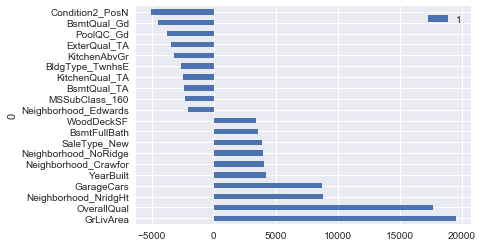

In [91]:
plot_coef(lasso_scaled)

#### Which features add / take away most value from a home?

* Coefficients that make sense: 
 - GrLivArea(+), OverallQual(+), GarageCars(+), Neighborhoods(+), SaleType_new(+), YearBuilt(+), 
    BsmtFullBath(+), WoodDeckSF(+), MSSubClass_160(-), BldgType_Twnhse(-)

* Coefficients that don't make sense: 
 - Condition2_PosN(-), BsmtQual_Gd(-), PoolQC_Gd(-)

"Above grade living area square feet" is the most important feature, with "overall quality" being the second most important. This is what we expected from the beginning. Also it makes sense that if the house is a town home or is in a planned unit development that this would significantly take away value from the home. However, there are a couple of significant coeficients that don't make sense and would need futher investigation.  

Given more time, I would have explored different options with filling in the missing data. Also I would have considered manually removing some of the columns (possibly PoolQu or Alley since there weren't that many data points).

# (Optional) Informing Business Value

Interpreting our work for a non-technical audience is a vital skill that every good Data Scientist must cultivate.  At the end of the day, our work must be informative to business process so connecting our detailed efforts to a high level strategy is critical.

We've established a few businesses cases that you should assert some explanation and advise best strategy through a model of your choice.  Also call out any exploratory analysis and reasoning for any recommendation.

##### For each question:
* Plot relevant data
* Fit a new model or use a previous  model
* Plot relevant coefficients


#### (Optional) Case 1: Which features add / take away most value from a home?

You just explained which coeffients add / take away most value, technically, but can you explain this in a non-technical manner?  Also, emphasize _why_ in your explanation.

- Choose a few examples and explain why the coefficients describe the target value of the property.

#### (Optional) Case 2: Can you identify any abnormally priced houses?
We might consider these being properties that are over or under predicted by price. Can you make sense of when and why these are over and under predicted?

#### (Optional) Case 3:  Which houses are good investments?

Which criteria would you look at?  How sure can you be of your assumptions?  Give precise metrics but also give a concise recommendation that is non-technical that communicates the risks of your anlaysis.

#### (Optional) Case 4:  Which houses are good investments (extended)?
One idea that is common in the real-estate invement community is called "flipping".  This usually entails buying a property with "changable" charactaristics that can be upgraded.  Examples of changable or "upgradable" features include:  A garage, a kitchen, etc.

Can you give us an idea of investments opportunities considering "upgradable" features?  You will have to explore this idea on your own and possibly do a little research for subject matter expertise.

- Some features of a house are worth more than others
- Some features can't be upgraded (ie: square footage)